In [1]:
#Adding Matplotlib inline magic command.
%matplotlib inline
#Adding dependencies and setup.
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Declaring variables that connect to the CSV files in the Resources folder.
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#Note1: You read a CSV file into a DATAFrame by pd.reach_csv()

In [4]:
#Reading the city data file and storing into a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
#Reading the ride data file and storing it into a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
#Inspecting City Data DataFrame:
#1Get all the rows that contain null values.
#2Make sure the driver_count column has an integer data type.
#3Find out how many data points there are for each type of city.

In [7]:
#Obtaining the colums and rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
#hmmmm....I thought there were 122 rows though (with headers)! let's check and make sure by running the following:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
#Great!!! So there are no null values within the city data set!

In [10]:
#Next, we need to see if the driver_count column has a numerical data type because 
#we plan to perform mathematical calculations on that column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
#Finally, we'll check to see how many data points there are for each type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
sum(city_data_df["type"]=="Urban")

66

In [13]:
sum(city_data_df["type"]=="Suburban")

36

In [14]:
sum(city_data_df["type"]=="Rural")

18

In [15]:
total_types = sum(city_data_df["type"]=="Urban") + sum(city_data_df["type"]=="Suburban") + sum(city_data_df["type"]=="Rural")
total_types

120

In [16]:
#Inspecting the Ride Data DataFrame
#Get all the rows that contain null values.
#Make sure the fare and ride_id columns are numerical data types.

In [17]:
#NUmber of columns and rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [18]:
#So we see that all columns have the same number of rows and that there are no descrepancies from this part of the inspection.
#Let's make srue that there are zero null vaues in all the columns. 
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [19]:
#Yay!!! No null values in the ride data df!!!

In [20]:
#Next, we need to determine if the fare and ride_id columns are numerical data types so that we can perform mathematical calculations on those columns.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [21]:
#ok, so we see that each column has one data type and that fare and ride id are numerical values! good!

In [22]:
#Now, let's merge!!!
#the common column both data sets have is city. So let's merge based on city columns!
#Therefore, we will merge the two DataFrames on the city column, and then add the city_data_df to the end of the ride_data_df DataFrame with the constraint how="left".
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [23]:
#Here are the steps to create a bubble chart:
#1.To get the average fare, we can use the Pandas mean() method for each city in the "fare" column
#2.To get the total number of rides for each city, we can use the Pandas count() method for 
#each city in the "ride_id" column.
#3.To make the bubble size correlate to the number of drivers for each city, we can get 
#the average driver_count for each city.
#Completing the steps will be more efficient if we create separate 
#DataFrames for each type and then create Data Series for each step.
#Let's create three separate DataFrames, one for each type of city.

In [24]:
#Creating the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
#Creating Suburban city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [26]:
#Finally, creating the third city DF: rural city DF.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [27]:
#Getting the number of rides for each city type.
#Looking at the x-axis title that was given to you, you see that you will need to get the number of rides for each 
#city for each city type.
#Omar says there is a quick way to do this using Pandas.
#Thinking back to your previous experience using Pandas, your mind quickly does a rewind to the time 
#you did something similar.

In [28]:
#To get the number of rides for each city by each type, we have to create a series 
#where the index is the name of the city and the column is the number of rides for that city.

In [29]:
#We'll use the groupby() function to create a Series of data that has the name of the city as the index,
#apply the count() method to the Series for eaach city, and select the ride_id column.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#I love this groupby(). Just saying lol.
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [30]:
#Creating suburban ride count:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [31]:
#Creating third count, this time for rural cities:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [32]:
#We now have one of the three datasets we need to create a bubble chart.
#Next, we'll use the groupby() function on the city type DataFrames to
#get the average fare for each city type. This will be our second dataset.


In [33]:
#Getting average fare for urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [34]:
#Average fare for suburban cities:
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare.head()
#note: suburban_avg_fare is a series, not a DataFrame.

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [35]:
#Average fare for rural cities:
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [36]:
#Now we have two of the three datasets that we need to create a bubble chart. 
#Next, we will use the groupby() function on the city type DataFrames
#to get the average number of drivers for each city type. This will be
#the third and final dataset. 

In [37]:
#Obtaining the average number of drivers for urabn cities:
urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [38]:
#Obtaiing the average number of drivers for suburban cities:
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [39]:
#Obtaining the average number of drivers for rural cities:
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [40]:
#Now we have all the data that we need and can begin building a bubble chart!

In [41]:
#Rememeber:  the bubble chart we are creating essentially consists of three different scatter pots: one for each type of city. 

In [42]:
#The data in the bubble chart will be represented in the following manner:
#1. The x-axis is the number of rides for each city.
#2. The y-axis is the average fare for each city.
#3. The size of each marker is the average number of drivers in each city.
#We have to create each scatter plot for each city type and then add them all to one chart. Wow. DId not know that we had to do it this way but cool. 

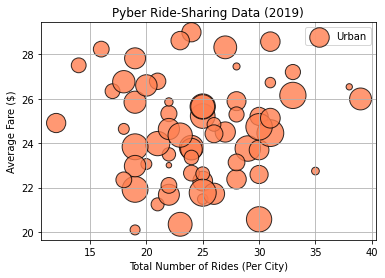

In [43]:
#Building scatter plot for urban cities:
plt.scatter(urban_ride_count,
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

In [44]:
#at first glance, there seems to be no relationship between the total number of rides and the average fare for urban cities. Even th enumber of drivers seems to have no influence on the relationship. 

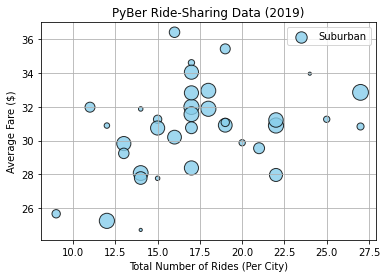

In [45]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
plt.show()

In [46]:
#from this chart alone, I do not see much of a relationship at all.

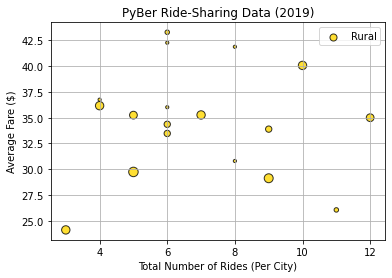

In [47]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
plt.show()

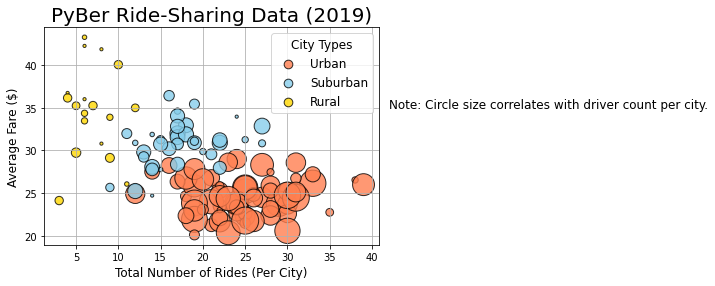

In [48]:
#To create a bubble chart that showcases all the different city types in one chart, we'll combine our three scatter plot code blocks 
#in one Jupyter Notebook cell.

plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#The markers in the legend have different sizes, which are automatically determined 
#based on the average size of the marker. Therefore, we'll 
#need to customize the legend to scale them to the same size.
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporating a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#Saving image
plt.savefig("Resources/Fig1.png")

plt.show()

In [49]:
#Now I see a relationship :)
#Nice!
#Apparently, the more rides and rivers there are, the lower the average fare.
# Also, there seem to be a lot more urban cities (just glancing here) than rural and uburban cities. 
#THere are also other factors that can contribute to the inverse relationship between the total 
#number of rides (per city) and the average fare ($).

In [50]:
#Now computing summary statistics.

In [51]:
#We'll use and compare the following three ways to calculate the summary statistics:
#The Pandas describe() function on the DataFrame or Series.
#The Pandas mean(), median(), and mode() methods on a Series.
#The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.
#Remember: The measures of central tendency reger to the tendency of data to be toward the middle of the dataset.
#The three key measures of central tendency are the mean, median, and mode.


In [52]:
#Let's use the describe() function on the urban, suburban, and rural DataFrames.

In [53]:
#summary statistics on urban_cities_df:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [54]:
#summary statistics on suburban cities:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [55]:
#summary statistics on rural cities:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [56]:
#Awesome sauce! Now let's calculate the summary statistics of the ride count for each city type.


In [57]:
#Summary statistics for urban rides
#remember, urban rides is a series, not a data frame!!!
#getting the central tendency statistics for the number of rides per city that is data type urban.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [58]:
#So there are 66 cities that are urban cities within the combined data set.
#the average number of rides per urban city is 25 rides.
#The standard deviation is 5.41 rides.
#The bottom 75% of cities had 28 rides or less.
#the highest number of rides for any of the urban cities was 39 rides.
#the lowest number of rides for any of the urban cities within the entire dataset was 12 rides.


In [59]:
#obtaining summary statistics for suburban city ride count:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [60]:
#obtaining summary statistics for rural city ride count:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [61]:
#If we want to get only the mean without getting the complete summary statistics, we can use the mean() method.

In [62]:
#Calculating the mean of the ride count for each city type.
ride_count_averages = {"Urban Ride Count Average ": round(urban_ride_count.mean(),2),
                       "Suburban Ride Count Average ": round(suburban_ride_count.mean(),2),
                       "Rural Ride Count Average ": round(rural_ride_count.mean(),2)}

ride_count_averages

{'Urban Ride Count Average ': 24.62,
 'Suburban Ride Count Average ': 17.36,
 'Rural Ride Count Average ': 6.94}

In [63]:
#Notice that the mean of the ride count for each city type using the mean() method is the same value that was returned using the describe() function.

In [64]:
#now get the median of the city type data frames:
ride_count_medians = {"Urban Ride Count Median ": round(urban_ride_count.median(),2),
                       "Suburban Ride Count Median ": round(suburban_ride_count.median(),2),
                       "Rural Ride Count Median ": round(rural_ride_count.median(),2)}

ride_count_medians

{'Urban Ride Count Median ': 24.0,
 'Suburban Ride Count Median ': 17.0,
 'Rural Ride Count Median ': 6.0}

In [65]:
ride_count_modes = {"Urban Ride Count Mode ": urban_ride_count.mode(),
                       "Suburban Ride Count Mode ": suburban_ride_count.mode(),
                       "Rural Ride Count Mode ": rural_ride_count.mode()}

ride_count_modes

{'Urban Ride Count Mode ': 0    22
 1    25
 dtype: int64,
 'Suburban Ride Count Mode ': 0    17
 dtype: int64,
 'Rural Ride Count Mode ': 0    6
 dtype: int64}

In [66]:
#they want us to calculate central tendency data now with Numpy...ugh!!!


In [67]:
# Import NumPy and the stats module from SciPy.
import numpy as np


In [68]:
#pip install scipy

In [69]:
import scipy.stats as sts

In [70]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [71]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [72]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [73]:
#calculate the summary statistics for the average fares for each city type.


In [74]:
#Add the following code to a new cell to create a Series with all the fares from the "fare" column for the 
#urban_cities_df DataFrame:
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [75]:
#Calculating tthe measures of central tendency for the average fare for urban cities. 
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [76]:
#why does the mode matter in this case? Doesn't make any sense but then again, maybe if $22.86 showed up 85% of the time instead of8% then that could be meaningful.

In [77]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [78]:
#Calculating tthe measures of central tendency for the average fare for suburban cities. 
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [79]:
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [80]:
#Calculating tthe measures of central tendency for the average fare for rural cities. 
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [81]:
#Now performing summary statistics for the number of driver by city type.

In [82]:
#Creating separate data series for driver count for Urban drivers.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [83]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for the drivers for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for the drivers for urban trips is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the drivers for urban trips is {mode_urban_drivers}.")

The mean for the drivers for urban trips is 36.68.
The median for the drivers for urban trips is 37.0.
The mode for the drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [84]:
#Creating separate data series for driver count for Urban drivers.
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [85]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for the drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for the drivers for suburban trips is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the drivers for suburban trips is {mode_suburban_drivers}.")

The mean for the drivers for suburban trips is 13.71.
The median for the drivers for suburban trips is 16.0.
The mode for the drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [86]:
#Creating separate data series for driver count for rural drivers.
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [87]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for the drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median for the drivers for rural trips is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for the drivers for rural trips is {mode_rural_drivers}.")

The mean for the drivers for rural trips is 4.30.
The median for the drivers for rural trips is 4.0.
The mode for the drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [88]:
#Checking for outliers now by creating a box-and-whisker plot.
#but in the context of this business, why would it be important to check for outliers now?


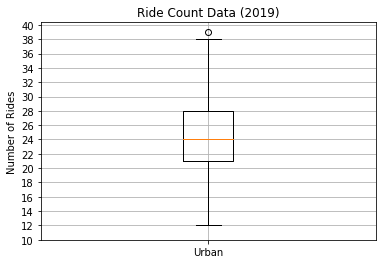

In [89]:
#For creating a box-and-whisker plot requires that we use the ax.bloxplot() function, which takes an array inside the parentheses. 
#Creating urban_ride_count box-and-whisker plot.

x_labels = ["Urban"]
#ummm, what is "urban" referring to? Urban cities data frame? ugh!!!
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [90]:
#Analysis:
#1. At least one outlier which is 39.
#2. The minimum is 12.
#3. THe median is 24 or the 50th percentile.
#4. The standard deviation is about 5 because the box upper and lower boundaries represent the upper and lower quartiles.


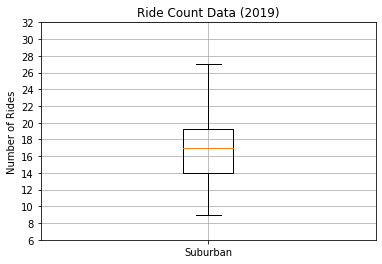

In [91]:
#Creating suburban_ride_count box-and-whisker plot.

x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(6, 34, step=2.0))
ax.grid()
plt.show()

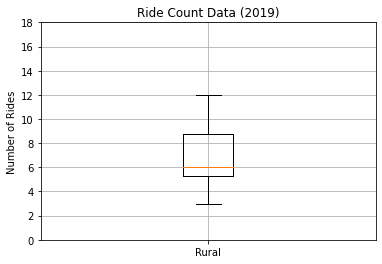

In [92]:
#Creating suburban_ride_count box-and-whisker plot.

x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 20, step=2.0))
ax.grid()
plt.show()

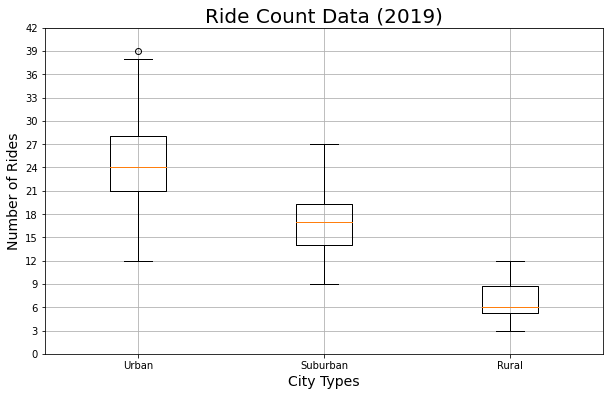

In [93]:
#Now let's put all three Box-And_whisker charts together!!!
x_labels = ["Urban", "Suburban", "Rural"]
#creaint new variable ridce_count_data that combines all three series.
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)",fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
#Saving the figure!
plt.savefig("Resources/Fig2.png")
plt.show()

In [94]:
#So as we saw in the previous charts, less drivers the further you get away from urban populations.
#what is intersting though is that the variation of data declines as you get to more rural areas,
#but this makes sense if you think about it because the less amount of rides
#means that the data can vary so much (there is a lower bound since riders 
#cannot be negative).

In [95]:
#Getting urban city with outlier of 39 and printing results!
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [96]:
#THis is amazing. Omg, I love coding so much!!!

In [97]:
#Box-and_whisker Plots for RIde Fare Data now! ":)"

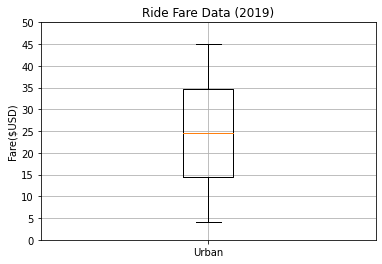

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [98]:
#Creating Box-And-Whisker plot for the urban fare data:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

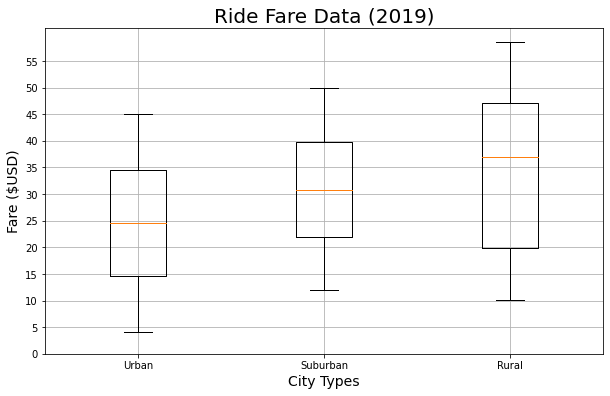

In [99]:
#Now let's put all three Box-And_whisker charts together!!!
x_labels = ["Urban", "Suburban", "Rural"]
#creaint new variable ridce_count_data that combines all three series.
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Fare Data (2019)",fontsize=20)
ax.set_ylabel("Fare ($USD)",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()
#Saving the figure!
plt.savefig("Resources/Fig3.png")
plt.show()

In [100]:
#Analysis: As previously established, the further out you go out of the cities, the more
#expensive the rides get for consuemrs and probably for Pyber as well.
#For fares, the distirbution seems to be more centered for 
#urban and suburban than for rural. AGain, this makes sense
#given that rural data set has signficiaantly less rides than
#urban and suburban which means according to central limit theoreum
#the data is more all over the place. 
#ANd there are not outliers for any of the box-and-whisker plots for
#any of the data.


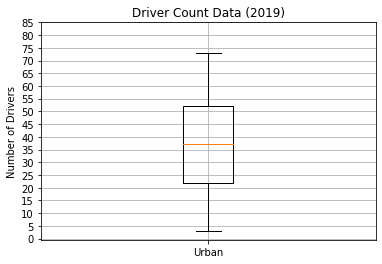

Summry Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [101]:
#Box-and-whisker plots for Driver Count Data
#Creating the box-and0whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summry Statistics")
urban_drivers.describe()

In [102]:
#Analysis: I would venture to say that there is a lot of variation with the avaialbility of drivers within urban cities. 
#Could be due to the variation of sizes of these cities and therefore variation in the supply of workers?
#more investigation is needed! Median is arond 37 drivers for urban cities.
#the average is also around 37 drivers for urban cities. 


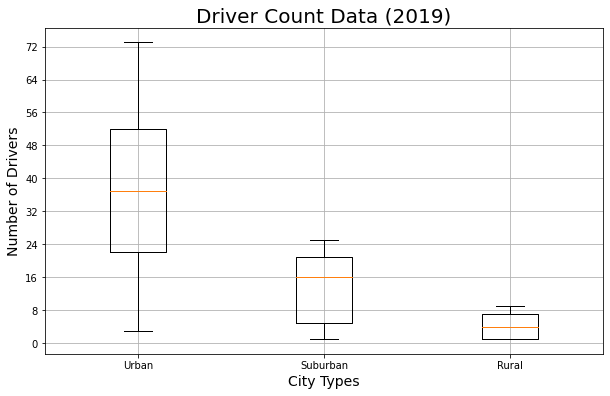

In [103]:
#Now let's put all three Box-And_whisker charts together!!!
x_labels = ["Urban", "Suburban", "Rural"]
#creaint new variable driver count data that combines all three series.
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Driver Count Data (2019)",fontsize=20)
ax.set_ylabel("Number of Drivers",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,80, step=8.0))
ax.grid()
#Saving the figure!
plt.savefig("Resources/Fig4.png")
plt.show()

In [104]:
#By looking at the driver count data and fare data, can you get a sense of the overall revenue?

In [105]:
#To create this pie chart, we will need to do the following:
#1. Get the total fares for each city type.
#2. Get the total for all the fares for all the city types.
#3. Calculate the percentage of the total fares for each city type.
#To get the total fares for city type, we need to create a Series where the index is the type of city on the pyber_data_df DataFrame and the column is the sum of 
#the fares for city type.

In [107]:
#To calculate the percentage of the total fares for each city type based on the total fares, we will:
#Use the groupby() function on the pyber_data_df DataFrame and group by the type of 
#city column so the type of city is the index.
#Apply the sum() method on the fare column to get the Series with the total number of fares for each city type.
#Divide the total fares for each city type by the total of all the fares and multiply by 100.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [108]:
#Next, we'll get the total fares by using the sum() method on the fare column of the pyber_data_df DataFrame.

In [110]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [111]:
#Next, we can calculate the percentage of total fares for each city type
#by dividing the sum_fares_by_type Series by the total_fares
#Series and multiplying by 100:

In [113]:
type_percents = 100 * (sum_fares_by_type / total_fares)
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [114]:
#We will create a pie chart by using the MATLAB approach, using the plt.pie() function.

In [120]:
#importing matplotlib to change font size of pie chart.

import matplotlib as mpl

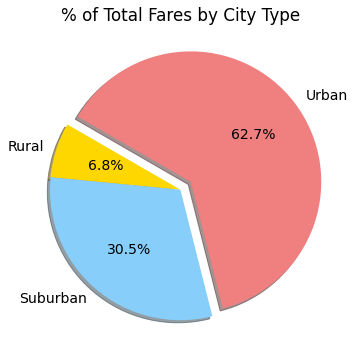

In [122]:
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams["font.size"] = 14
plt.savefig("Resources/Fig5.png")
plt.show()